<a href="https://colab.research.google.com/github/rito09/AICamp_Batch7/blob/main/Product_quality_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)

# Load data #

In [4]:
path = '/content/drive/MyDrive/AICamp_7/Product_quality_check/practice_data.csv'
raw_df = pd.read_csv(path)
raw_df.shape

(13293, 156)

In [5]:
raw_df.head()

,index,hashed_factory_id,country,hashed_type_of_inspection,style_number,item_number,brand_number,factory_inspection_fail_rate_30,factory_inspection_fail_rate_60,factory_inspection_fail_rate_90,factory_inspection_fail_rate_120,factory_inspection_fail_rate_150,hashed_product_line,hashed_product_category,hashed_product_id,product_available_quantity,product_ppm_1,product_ppm_2,product_ppm_3,product_ppm_4,product_ppm_5,product_ppm_6,product_ppm_7,product_ppm_8,product_ppm_9,product_defect_rate_30,product_defect_rate_60,product_defect_rate_90,product_defect_rate_120,product_defect_rate_150,product_workmanship_defect_rate_30,product_workmanship_defect_rate_60,product_workmanship_defect_rate_90,product_workmanship_defect_rate_120,product_workmanship_defect_rate_150,product_workmanship_critical_defect_rate_30,product_workmanship_critical_defect_rate_60,product_workmanship_critical_defect_rate_90,product_workmanship_critical_defect_rate_120,product_workmanship_critical_defect_rate_150,product_workmanship_major_defect_rate_30,product_workmanship_major_defect_rate_60,product_workmanship_major_defect_rate_90,product_workmanship_major_defect_rate_120,product_workmanship_major_defect_rate_150,product_workmanship_minor_defect_rate_30,product_workmanship_minor_defect_rate_60,product_workmanship_minor_defect_rate_90,product_workmanship_minor_defect_rate_120,product_workmanship_minor_defect_rate_150,product_packaging_defect_rate_30,product_packaging_defect_rate_60,product_packaging_defect_rate_90,product_packaging_defect_rate_120,product_packaging_defect_rate_150,product_packaging_critical_defect_rate_30,product_packaging_critical_defect_rate_60,product_packaging_critical_defect_rate_90,product_packaging_critical_defect_rate_120,product_packaging_critical_defect_rate_150,product_packaging_major_defect_rate_30,product_packaging_major_defect_rate_60,product_packaging_major_defect_rate_90,product_packaging_major_defect_rate_120,product_packaging_major_defect_rate_150,product_packaging_minor_defect_rate_30,product_packaging_minor_defect_rate_60,product_packaging_minor_defect_rate_90,product_packaging_minor_defect_rate_120,product_packaging_minor_defect_rate_150,product_measurement_defect_rate_30,product_measurement_defect_rate_60,product_measurement_defect_rate_90,product_measurement_defect_rate_120,product_measurement_defect_rate_150,product_measurement_critical_defect_rate_30,product_measurement_critical_defect_rate_60,product_measurement_critical_defect_rate_90,product_measurement_critical_defect_rate_120,product_measurement_critical_defect_rate_150,product_measurement_major_defect_rate_30,product_measurement_major_defect_rate_60,product_measurement_major_defect_rate_90,product_measurement_major_defect_rate_120,product_measurement_major_defect_rate_150,product_measurement_minor_defect_rate_30,product_measurement_minor_defect_rate_60,product_measurement_minor_defect_rate_90,product_measurement_minor_defect_rate_120,product_measurement_minor_defect_rate_150,factory_product_defect_rate_30,factory_product_defect_rate_60,factory_product_defect_rate_90,factory_product_defect_rate_120,factory_product_defect_rate_150,factory_product_workmanship_defect_rate_30,factory_product_workmanship_defect_rate_60,factory_product_workmanship_defect_rate_90,factory_product_workmanship_defect_rate_120,factory_product_workmanship_defect_rate_150,factory_product_workmanship_critical_defect_rate_30,factory_product_workmanship_critical_defect_rate_60,factory_product_workmanship_critical_defect_rate_90,factory_product_workmanship_critical_defect_rate_120,factory_product_workmanship_critical_defect_rate_150,factory_product_workmanship_major_defect_rate_30,factory_product_workmanship_major_defect_rate_60,factory_product_workmanship_major_defect_rate_90,factory_product_workmanship_major_defect_rate_120,factory_product_workmanship_major_defect_rate_150,factory_product_workmanship_minor_defect_rate_30,factory_product_workmanship_minor_defect_rate_60,factory_product_workmanship_m

In [6]:
raw_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13293 entries, 0 to 13292
Data columns (total 156 columns):
 #    Column                                                Non-Null Count  Dtype  
---   ------                                                --------------  -----  
 0    index                                                 13293 non-null  int64  
 1    hashed_factory_id                                     13293 non-null  object 
 2    country                                               13226 non-null  object 
 3    hashed_type_of_inspection                             13225 non-null  object 
 4    style_number                                          13222 non-null  object 
 5    item_number                                           13234 non-null  object 
 6    brand_number                                          13232 non-null  object 
 7    factory_inspection_fail_rate_30                       13293 non-null  float64
 8    factory_inspection_fail_rate_60             

In [7]:
raw_df['label'].value_counts()

0    12641
1      652
Name: label, dtype: int64

We can see that this dataset is imbalanced and containing Null values.

# Preprocessing Data

## Cleaning data

### Remove failed samples

Samples which is missed over 20% information should be removed.

In [8]:
num_cols = len(raw_df.columns)
num_nulls_each_row = raw_df.isnull().sum(axis=1).tolist()

In [9]:
idx_null_rows = [idx for idx in range(len(raw_df)) if (num_nulls_each_row[idx]/num_cols)>0.2]

print(idx_null_rows)

[]


There is no failed sample so do nothing.

### Fill in missing values

In [10]:
null_cols = raw_df.columns[raw_df.isnull().any(axis=0)].tolist()
count_null_cols = raw_df[null_cols].isnull().sum()

print(count_null_cols)

country                      67
hashed_type_of_inspection    68
style_number                 71
item_number                  59
brand_number                 61
hashed_product_line          58
hashed_product_category      69
dtype: int64


As I can see, these features above are categorical feature, so I fill in with the most frequent value of each column.

In [11]:
for col in null_cols:
  raw_df[col].fillna(raw_df[col].mode()[0], inplace=True)

In [12]:
raw_df.isnull().any().any()

False

### Remove duplicated samples

In [13]:
raw_df = raw_df.drop_duplicates()
len(raw_df)

13293

### Group less frequent categories together

In [14]:
raw_df.head()

,index,hashed_factory_id,country,hashed_type_of_inspection,style_number,item_number,brand_number,factory_inspection_fail_rate_30,factory_inspection_fail_rate_60,factory_inspection_fail_rate_90,factory_inspection_fail_rate_120,factory_inspection_fail_rate_150,hashed_product_line,hashed_product_category,hashed_product_id,product_available_quantity,product_ppm_1,product_ppm_2,product_ppm_3,product_ppm_4,product_ppm_5,product_ppm_6,product_ppm_7,product_ppm_8,product_ppm_9,product_defect_rate_30,product_defect_rate_60,product_defect_rate_90,product_defect_rate_120,product_defect_rate_150,product_workmanship_defect_rate_30,product_workmanship_defect_rate_60,product_workmanship_defect_rate_90,product_workmanship_defect_rate_120,product_workmanship_defect_rate_150,product_workmanship_critical_defect_rate_30,product_workmanship_critical_defect_rate_60,product_workmanship_critical_defect_rate_90,product_workmanship_critical_defect_rate_120,product_workmanship_critical_defect_rate_150,product_workmanship_major_defect_rate_30,product_workmanship_major_defect_rate_60,product_workmanship_major_defect_rate_90,product_workmanship_major_defect_rate_120,product_workmanship_major_defect_rate_150,product_workmanship_minor_defect_rate_30,product_workmanship_minor_defect_rate_60,product_workmanship_minor_defect_rate_90,product_workmanship_minor_defect_rate_120,product_workmanship_minor_defect_rate_150,product_packaging_defect_rate_30,product_packaging_defect_rate_60,product_packaging_defect_rate_90,product_packaging_defect_rate_120,product_packaging_defect_rate_150,product_packaging_critical_defect_rate_30,product_packaging_critical_defect_rate_60,product_packaging_critical_defect_rate_90,product_packaging_critical_defect_rate_120,product_packaging_critical_defect_rate_150,product_packaging_major_defect_rate_30,product_packaging_major_defect_rate_60,product_packaging_major_defect_rate_90,product_packaging_major_defect_rate_120,product_packaging_major_defect_rate_150,product_packaging_minor_defect_rate_30,product_packaging_minor_defect_rate_60,product_packaging_minor_defect_rate_90,product_packaging_minor_defect_rate_120,product_packaging_minor_defect_rate_150,product_measurement_defect_rate_30,product_measurement_defect_rate_60,product_measurement_defect_rate_90,product_measurement_defect_rate_120,product_measurement_defect_rate_150,product_measurement_critical_defect_rate_30,product_measurement_critical_defect_rate_60,product_measurement_critical_defect_rate_90,product_measurement_critical_defect_rate_120,product_measurement_critical_defect_rate_150,product_measurement_major_defect_rate_30,product_measurement_major_defect_rate_60,product_measurement_major_defect_rate_90,product_measurement_major_defect_rate_120,product_measurement_major_defect_rate_150,product_measurement_minor_defect_rate_30,product_measurement_minor_defect_rate_60,product_measurement_minor_defect_rate_90,product_measurement_minor_defect_rate_120,product_measurement_minor_defect_rate_150,factory_product_defect_rate_30,factory_product_defect_rate_60,factory_product_defect_rate_90,factory_product_defect_rate_120,factory_product_defect_rate_150,factory_product_workmanship_defect_rate_30,factory_product_workmanship_defect_rate_60,factory_product_workmanship_defect_rate_90,factory_product_workmanship_defect_rate_120,factory_product_workmanship_defect_rate_150,factory_product_workmanship_critical_defect_rate_30,factory_product_workmanship_critical_defect_rate_60,factory_product_workmanship_critical_defect_rate_90,factory_product_workmanship_critical_defect_rate_120,factory_product_workmanship_critical_defect_rate_150,factory_product_workmanship_major_defect_rate_30,factory_product_workmanship_major_defect_rate_60,factory_product_workmanship_major_defect_rate_90,factory_product_workmanship_major_defect_rate_120,factory_product_workmanship_major_defect_rate_150,factory_product_workmanship_minor_defect_rate_30,factory_product_workmanship_minor_defect_rate_60,factory_product_workmanship_m

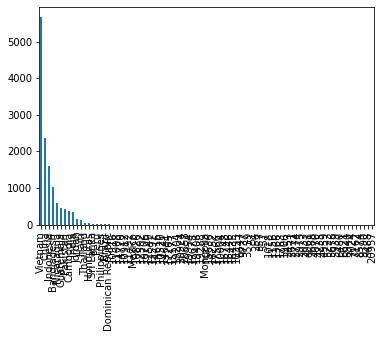

In [15]:
(raw_df['country'].value_counts()).plot(kind='bar')

In [16]:
def grouping_into_newCat(dataframe, col_name, threshold):
  freq_count = dataframe[col_name].value_counts()
  
  filter = (freq_count/freq_count.sum() *100).lt(threshold)  
  to_newCat = dataframe[col_name].isin(freq_count[filter].index)
 
  dataframe[col_name] = np.where(to_newCat, 'Other', dataframe[col_name])

In [17]:
# select categorical features
col_to_group = raw_df.select_dtypes(exclude=np.number).columns
print(col_to_group)
for col in col_to_group:
  grouping_into_newCat(raw_df, col, 4)

Index(['hashed_factory_id', 'country', 'hashed_type_of_inspection',
       'style_number', 'item_number', 'brand_number', 'hashed_product_line',
       'hashed_product_category', 'hashed_product_id'],
      dtype='object')


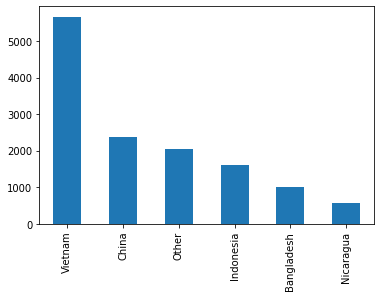

In [18]:
(raw_df['country'].value_counts()).plot(kind='bar')

### Rename long categories 

In [19]:
raw_df['hashed_type_of_inspection'] = raw_df['hashed_type_of_inspection'].map(
    {
        "e06d28d1365467625ebfa999328501705a3398bb": "e06d",
        "7ba31299766426922dbeb7c96b247068252ea5eb": "7ba3",
        "4a31b54c7b1ada762e54a711dc598073de477352": "4a31",
        "Other": "Other"          
    }
)

raw_df['hashed_product_line'] = raw_df['hashed_product_line'].map(
    {
        "a8a2b30f8dba82d690db42ce743475f11be31030": "a8a2",
        "Other": "Other"        
    }
)

raw_df['hashed_product_category'] = raw_df['hashed_product_category'].map(
    {
        "6a812c559943cb2c29da6c739b132c3d4a8905f1": "6a81",
        "3e320c3e3556eccdfbd52ef5c5ef5e8c87571101": "3e32",
        "c67af124d1806581c4ad29dc616db381f5d8e694": "c67a",
        "174f4586e4ccef9bc5137f310b761274932be8df": "174f",
        "834519fbea2ede850f6d069a86b76d61eb2edf13": "8345",
        "dfa5a02841815c4ef4920c38f876d0f21036fbb7": "dfa5",
      	"Other": "Other"
    }
)

raw_df['hashed_product_id'] = raw_df['hashed_product_id'].map(
    {
        "28f9ef723778c6d377fc75ac131ed352e708eb21": "28f9",
        "e7bad74dd28e94f1daf841c9e59086263524c38d": "e7ba",
        "23748c0065b54b1512899bef390a9a1afff01150": "2374",
        "12cd99beee59d3f006dcde774fc030dcab312e74": "12cd",
        "c9029730b54007a83c56957fe165aeb6d67cb62c": "c902",
        "Other": "Other",
    }
)

### Remove obvious useless features 

In [20]:
raw_df.nunique()

index                                                   13293
hashed_factory_id                                           1
country                                                     6
hashed_type_of_inspection                                   4
style_number                                                5
item_number                                                 9
brand_number                                                3
factory_inspection_fail_rate_30                           244
factory_inspection_fail_rate_60                           542
factory_inspection_fail_rate_90                           765
factory_inspection_fail_rate_120                         1018
factory_inspection_fail_rate_150                         1180
hashed_product_line                                         2
hashed_product_category                                     7
hashed_product_id                                           6
product_available_quantity                               5700
product_

In [21]:
fea_with_1_unique = [col for col in raw_df.columns if (raw_df[col]==raw_df[col].mode()[0]).all()]
print(fea_with_1_unique)

['hashed_factory_id', 'product_measurement_defect_rate_30', 'product_measurement_defect_rate_60', 'product_measurement_defect_rate_90', 'product_measurement_defect_rate_120', 'product_measurement_defect_rate_150', 'product_measurement_critical_defect_rate_30', 'product_measurement_critical_defect_rate_60', 'product_measurement_critical_defect_rate_90', 'product_measurement_critical_defect_rate_120', 'product_measurement_critical_defect_rate_150', 'product_measurement_major_defect_rate_30', 'product_measurement_major_defect_rate_60', 'product_measurement_major_defect_rate_90', 'product_measurement_major_defect_rate_120', 'product_measurement_major_defect_rate_150', 'product_measurement_minor_defect_rate_30', 'product_measurement_minor_defect_rate_60', 'product_measurement_minor_defect_rate_90', 'product_measurement_minor_defect_rate_120', 'product_measurement_minor_defect_rate_150', 'factory_product_measurement_defect_rate_30', 'factory_product_measurement_defect_rate_60', 'factory_prod

In [22]:
raw_df = raw_df.drop(labels=fea_with_1_unique + ['index'], axis=1)

In [23]:
raw_df.info()
raw_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13293 entries, 0 to 13292
Columns: 114 entries, country to label
dtypes: float64(105), int64(1), object(8)
memory usage: 11.7+ MB


,country,hashed_type_of_inspection,style_number,item_number,brand_number,factory_inspection_fail_rate_30,factory_inspection_fail_rate_60,factory_inspection_fail_rate_90,factory_inspection_fail_rate_120,factory_inspection_fail_rate_150,hashed_product_line,hashed_product_category,hashed_product_id,product_available_quantity,product_ppm_1,product_ppm_2,product_ppm_3,product_ppm_4,product_ppm_5,product_ppm_6,product_ppm_7,product_ppm_8,product_ppm_9,product_defect_rate_30,product_defect_rate_60,product_defect_rate_90,product_defect_rate_120,product_defect_rate_150,product_workmanship_defect_rate_30,product_workmanship_defect_rate_60,product_workmanship_defect_rate_90,product_workmanship_defect_rate_120,product_workmanship_defect_rate_150,product_workmanship_critical_defect_rate_30,product_workmanship_critical_defect_rate_60,product_workmanship_critical_defect_rate_90,product_workmanship_critical_defect_rate_120,product_workmanship_critical_defect_rate_150,product_workmanship_major_defect_rate_30,product_workmanship_major_defect_rate_60,product_workmanship_major_defect_rate_90,product_workmanship_major_defect_rate_120,product_workmanship_major_defect_rate_150,product_workmanship_minor_defect_rate_30,product_workmanship_minor_defect_rate_60,product_workmanship_minor_defect_rate_90,product_workmanship_minor_defect_rate_120,product_workmanship_minor_defect_rate_150,product_packaging_defect_rate_30,product_packaging_defect_rate_60,product_packaging_defect_rate_90,product_packaging_defect_rate_120,product_packaging_defect_rate_150,product_packaging_critical_defect_rate_30,product_packaging_critical_defect_rate_60,product_packaging_critical_defect_rate_90,product_packaging_critical_defect_rate_120,product_packaging_critical_defect_rate_150,product_packaging_major_defect_rate_30,product_packaging_major_defect_rate_60,product_packaging_major_defect_rate_90,product_packaging_major_defect_rate_120,product_packaging_major_defect_rate_150,product_packaging_minor_defect_rate_30,product_packaging_minor_defect_rate_60,product_packaging_minor_defect_rate_90,product_packaging_minor_defect_rate_120,product_packaging_minor_defect_rate_150,factory_product_defect_rate_30,factory_product_defect_rate_60,factory_product_defect_rate_90,factory_product_defect_rate_120,factory_product_defect_rate_150,factory_product_workmanship_defect_rate_30,factory_product_workmanship_defect_rate_60,factory_product_workmanship_defect_rate_90,factory_product_workmanship_defect_rate_120,factory_product_workmanship_defect_rate_150,factory_product_workmanship_critical_defect_rate_30,factory_product_workmanship_critical_defect_rate_60,factory_product_workmanship_critical_defect_rate_90,factory_product_workmanship_critical_defect_rate_120,factory_product_workmanship_critical_defect_rate_150,factory_product_workmanship_major_defect_rate_30,factory_product_workmanship_major_defect_rate_60,factory_product_workmanship_major_defect_rate_90,factory_product_workmanship_major_defect_rate_120,factory_product_workmanship_major_defect_rate_150,factory_product_workmanship_minor_defect_rate_30,factory_product_workmanship_minor_defect_rate_60,factory_product_workmanship_minor_defect_rate_90,factory_product_workmanship_minor_defect_rate_120,factory_product_workmanship_minor_defect_rate_150,factory_product_packaging_defect_rate_30,factory_product_packaging_defect_rate_60,factory_product_packaging_defect_rate_90,factory_product_packaging_defect_rate_120,factory_product_packaging_defect_rate_150,factory_product_packaging_critical_defect_rate_30,factory_product_packaging_critical_defect_rate_60,factory_product_packaging_critical_defect_rate_90,factory_product_packaging_critical_defect_rate_120,factory_product_packaging_critical_defect_rate_150,factory_product_packaging_major_defect_rate_30,factory_product_packaging_major_defect_rate_60,factory_product_packaging_major_defect_rate_90,factory_product_packaging_major_defect_rate_120,factory_product_packaging_major_defect_rate_150,factory_product_packa

## Feature Selection (not)

## Visualize (not)

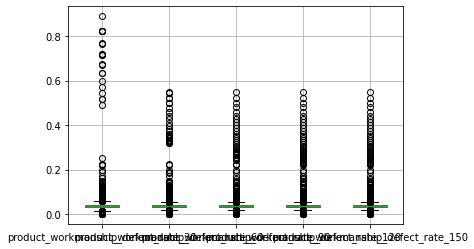

In [24]:
bp = raw_df.boxplot(column=['product_workmanship_defect_rate_30','product_workmanship_defect_rate_60',
                            'product_workmanship_defect_rate_90','product_workmanship_defect_rate_120',
                            'product_workmanship_defect_rate_150'])

In [ ]:
country_label = pd.concat([df.country, df.label], axis=1)
counting = country_label.value_counts().to_frame('count')
pivot = pd.pivot_table(data=counting, index=['country'], columns=['label'], values='count')
transpose = pivot.T
pivot.plot(kind='bar', stacked=False, color=['lightseagreen', 'tomato'])
transpose.plot(kind='bar', stacked=True)

In [ ]:
perc_country = df['country'].value_counts(normalize = True).to_frame().style.format('{:.2%}')

In [ ]:
(df['country'].value_counts()).plot(kind='bar')

plt.title("Countries and their distribution")
plt.xlabel("Country")
plt.ylabel("Number of existence")

plt.xticks(rotation=30, horizontalalignment="center")

## Feature Encoding (not)

In [ ]:
targets = df.loc[:,['label']]
targets['label'].value_counts()

In [ ]:
X = df.drop(['label'], axis=1)
y = targets['label']

In [ ]:
X_ohe = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape)

## Imbalanced Data

In [24]:
from numpy import mean

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [25]:
df = raw_df.copy()
y = df['label']
X = df.drop(labels=['label'], axis=1)

In [26]:
y.value_counts()

0    12641
1      652
Name: label, dtype: int64

### Oversampling

In [27]:
ros = RandomOverSampler(sampling_strategy=1)
X_ros, y_ros = ros.fit_resample(X, y)
y_ros.value_counts()

0    12641
1    12641
Name: label, dtype: int64

In [28]:
X_ros = pd.get_dummies(X_ros)

### Undersampling

In [30]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)
y_rus.value_counts()

0    652
1    652
Name: label, dtype: int64

In [31]:
X_rus = pd.get_dummies(X_rus)

# Model

## Test model (without processing the imbalanced)

In [33]:
X_train = pd.get_dummies(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.25)
X_train.shape, X_test.shape

((9969, 147), (3324, 147))

In [35]:
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
hp = {'max_depth': [2, 3, 5, 10, 20],
      'min_samples_leaf': [5, 10, 20, 50, 100],
      'criterion': ['gini', 'entropy']}

In [39]:
grid_search = GridSearchCV(estimator=dt_default, 
                           param_grid=hp, 
                           cv=4, n_jobs=-1, verbose=1, scoring = 'f1')

In [40]:
%time
grid_search.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [41]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [42]:
dt_best = grid_search.best_estimator_

In [44]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3179
           1       0.13      0.13      0.13       145

    accuracy                           0.92      3324
   macro avg       0.55      0.55      0.55      3324
weighted avg       0.92      0.92      0.92      3324



## With Oversampling Data

In [45]:
X_ros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25282 entries, 0 to 25281
Columns: 147 entries, factory_inspection_fail_rate_30 to hashed_product_id_e7ba
dtypes: float64(105), uint8(42)
memory usage: 21.3 MB


In [46]:
Xros_train, Xros_test, yros_train, yros_test = train_test_split(X_ros, y_ros, test_size=0.25)
Xros_train.shape, Xros_test.shape

((18961, 147), (6321, 147))

In [47]:
dt_ros = DecisionTreeClassifier()
dt_ros.fit(Xros_train, yros_train)

DecisionTreeClassifier()

In [48]:
grid_search_ros = GridSearchCV(estimator=dt_ros,
                               param_grid=hp, 
                               cv=5, n_jobs=-1, verbose=1, scoring = 'f1')

In [49]:
%time
grid_search_ros.fit(Xros_train, yros_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [50]:
dt_ros_best = grid_search_ros.best_estimator_

In [51]:
print(classification_report(yros_test, dt_ros_best.predict(Xros_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3108
           1       0.92      1.00      0.96      3213

    accuracy                           0.95      6321
   macro avg       0.96      0.95      0.95      6321
weighted avg       0.96      0.95      0.95      6321



## With Undersampling Data

In [52]:
X_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Columns: 147 entries, factory_inspection_fail_rate_30 to hashed_product_id_e7ba
dtypes: float64(105), uint8(42)
memory usage: 1.1 MB


In [53]:
Xrus_train, Xrus_test, yrus_train, yrus_test = train_test_split(X_rus, y_rus, test_size=0.25)
Xrus_train.shape, Xrus_test.shape

((978, 147), (326, 147))

In [54]:
dt_rus = DecisionTreeClassifier()
dt_rus.fit(Xrus_train, yrus_train)

DecisionTreeClassifier()

In [55]:
grid_search_rus = GridSearchCV(estimator=dt_rus,
                               param_grid=hp, 
                               cv=5, n_jobs=-1, verbose=1, scoring = 'f1')

In [56]:
%time
grid_search_rus.fit(Xrus_train, yrus_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs
Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [57]:
dt_rus_best = grid_search_rus.best_estimator_

In [58]:
print(classification_report(yrus_test, dt_rus_best.predict(Xrus_test)))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       164
           1       0.73      0.72      0.73       162

    accuracy                           0.73       326
   macro avg       0.73      0.73      0.73       326
weighted avg       0.73      0.73      0.73       326

